<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Отток-клиентов-банка" data-toc-modified-id="Отток-клиентов-банка-1">Отток клиентов банка</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1.1">Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Переименование-столбцов" data-toc-modified-id="Переименование-столбцов-1.1.1">Переименование столбцов</a></span></li><li><span><a href="#Удаление-дубликатов" data-toc-modified-id="Удаление-дубликатов-1.1.2">Удаление дубликатов</a></span></li><li><span><a href="#Анализ-признаков" data-toc-modified-id="Анализ-признаков-1.1.3">Анализ признаков</a></span></li><li><span><a href="#Прямое-кодирование" data-toc-modified-id="Прямое-кодирование-1.1.4">Прямое кодирование</a></span></li><li><span><a href="#Корреляция-признаков" data-toc-modified-id="Корреляция-признаков-1.1.5">Корреляция признаков</a></span></li><li><span><a href="#Разбивка-данных-на-выборки" data-toc-modified-id="Разбивка-данных-на-выборки-1.1.6">Разбивка данных на выборки</a></span></li><li><span><a href="#Масштабирование-признаков" data-toc-modified-id="Масштабирование-признаков-1.1.7">Масштабирование признаков</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1.8">Вывод</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-1.2">Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Построение-моделей" data-toc-modified-id="Построение-моделей-1.2.1">Построение моделей</a></span></li><li><span><a href="#Проверка-моделей-на-адекватность" data-toc-modified-id="Проверка-моделей-на-адекватность-1.2.2">Проверка моделей на адекватность</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.2.3">Вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-1.3">Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-1.3.1">Взвешивание классов</a></span></li><li><span><a href="#Upsampling" data-toc-modified-id="Upsampling-1.3.2">Upsampling</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.3.3">Вывод</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-1.4">Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.5">Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-1.6">Чек-лист готовности проекта</a></span></li></ul></li></ul></div>

# Отток клиентов банка

**Цель проекта** - спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. В наличии исторические данные о поведении клиентов и расторжении договоров с банком. 

Массив данных содержит в себе информацию о клиентах банка (пол, возраст, страна проживания, баланс на счете, наличие кредитной карты, кредитный рейтинг и пр.).

Для решения задачи требуется построить модель с предельно большим значением *F1*-меры (не ниже 0.59). *F1*-меру следует проверить на тестовой выборке. Дополнительно необходимо измерить *AUC-ROC* и сравнить её значение с *F1*-мерой.

В ходе исследования решается ряд **задач**:

- техническая подготовка данных (проверка на дубликаты, переименование столбцов и удаление ненужных);
- проведение анализа признаков в разрезе оттока;
- определение корреляции между признаками и целевой переменной;
- проведение процедур кодирования и стандартизации данных; 
- построение моделей прогнозирования: логистической регрессии, решающего дерева и случайного леса;
- балансировка классов;
- выбор лучшей модели на основе метрики F1 и проверка на тестовой выборке.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

Импорт библиотек, которые потребуются для выполнения исследования:

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score 
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings('ignore')

Загрузка датасета:

In [2]:
churn = pd.read_csv('/datasets/Churn.csv')

Получение данных о первых пяти строках таблицы **churn**:

In [3]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Общая информация о данных таблицы **churn**:

In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


В датафрейме **churn** представлена информация о характеристиках клиентов банка и их поведении (попал ли клиент в отток). Он состоит из следующих столбцов: 

- **RowNumber** — индекс строки в данных;
- **CustomerId** — уникальный идентификатор клиента;
- **Surname** — фамилия;
- **CreditScore** — кредитный рейтинг;
- **Geography** — страна проживания;
- **Gender** — пол;
- **Age** — возраст;
- **Tenure** — сколько лет человек является клиентом банка;
- **Balance** — баланс на счёте;
- **NumOfProducts** — количество продуктов банка, используемых клиентом;
- **HasCrCard** — наличие кредитной карты;
- **IsActiveMember** — активность клиента;
- **EstimatedSalary** — предполагаемая зарплата;
- **Exited** — факт ухода клиента.

Общее количество объектов - 10 000. Пропуски содержатся только в столбце **Tenure**. Основная часть информации представлена в числовом виде (как целочисленный тип данных, так и вещественный). Столбцы **Surname**, **Geography** и **Gender** - содержат данные строкового типа. 

---

Подготовим исходные данные для дальнейшего исседования и построения прогноза.

### Переименование столбцов

Переименуем столбцы в соответствии с общепринятой практикой:

In [5]:
# функция принимает на вход строку и ставит перед каждой заглавной буквой, кроме первой, символ "_", 
# после чего приводит все буквы к нижнему регистру

def convert(string):
    return re.sub( '(?<!^)(?=[A-Z])', '_', string).lower()

In [6]:
churn = churn.rename(columns = lambda x: convert(x))
churn.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

Столбцы переименованы.

### Удаление дубликатов

Проверим таблицу на наличие полностью повторяющихся строк:

In [7]:
churn.duplicated().sum()

0

Полных дубликатов в данных нет. 

### Анализ признаков

Теперь рассмотрим отдельно каждый столбец на предмет наличия ошибок в данных, аномалий и пр. Начнем с основного показателя (в дальнейшем - целевой переменной) - оттока.

**exited - факт ухода клиента**

По условию под фактом ухода клиента понимается расторжение договора с банком.

In [8]:
display(churn['exited'].value_counts())
display(churn['exited'].value_counts(normalize = True))

0    7963
1    2037
Name: exited, dtype: int64

0    0.7963
1    0.2037
Name: exited, dtype: float64

В отток попало 20% клиентов. Пропусков и других аномалий в столбце нет.

Для дальнейшего удобства разобьем датасет на две группы - тех, кто ушел в отток, и тех, кто не ушел:

In [9]:
churn_clients = churn.query('exited == 1')
nonchurn_clients = churn.query('exited == 0')

Будем рассматривать каждый признак в разрезе оттока.

**row_number — индекс строки в данных**

In [10]:
churn['row_number'].duplicated().sum()

0

In [11]:
churn['row_number'].agg(['min', 'max'])

min        1
max    10000
Name: row_number, dtype: int64

В столбце по порядку перечислены числа от 1 до 10 000. Для решения задачи он нам не требуется. Удалим его:

In [12]:
churn = churn.drop(['row_number'] , axis = 1)
churn_clients = churn_clients.drop(['row_number'] , axis = 1)
nonchurn_clients = nonchurn_clients.drop(['row_number'] , axis = 1)

**customer_id — уникальный идентификатор клиента**

In [13]:
churn['customer_id'].duplicated().sum()

0

Повторяющиеся идентификаторы клиентов в датасете отсутствуют. Здравый смысл подсказывает, что зависимости оттока от указанной переменной нет. Удалим указанный столбец после проведения EDA.

**surname — фамилия**

In [14]:
churn['surname'].nunique()

2932

В датасете из 10 000 записей уникальных фамилий 2 932. Крайне маловероятна связь между указанной переменной и оттоком. Удалим и этот столбец:

In [15]:
churn = churn.drop(['surname'] , axis = 1)
churn_clients = churn_clients.drop(['surname'] , axis = 1)
nonchurn_clients = nonchurn_clients.drop(['surname'] , axis = 1)

**credit_score — кредитный рейтинг**

In [16]:
churn['credit_score'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: credit_score, dtype: float64

Самый низкий кредитный рейтинг - 350 баллов, самый высокий - 850. Среднее значение - 650,5 баллов, что практически совпадает с медианой (652), стандартное отклонение - 96,6.

Построим график распределения:

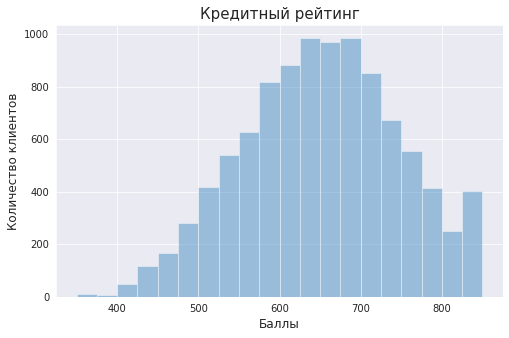

In [17]:
plt.figure(figsize=(8, 5))
sns.set_style("darkgrid")
fig = sns.distplot(churn['credit_score'], kde = False, bins = 20)
fig.set_title("Кредитный рейтинг", fontsize = 15)
fig.set_xlabel("Баллы", fontsize = 12)
fig.set_ylabel("Количество клиентов", fontsize = 12)

plt.show()

Распределение соответствует нормальному, за исключением правого края, где наблюдается неожиданно высокое количество клиентов с самым высоким кредитным рейтингом.

Среднее значение признака **score** несколько выше в группе без оттока:

In [18]:
churn_clients['credit_score'].mean().round(3)

645.351

In [19]:
nonchurn_clients['credit_score'].mean().round(3)

651.853

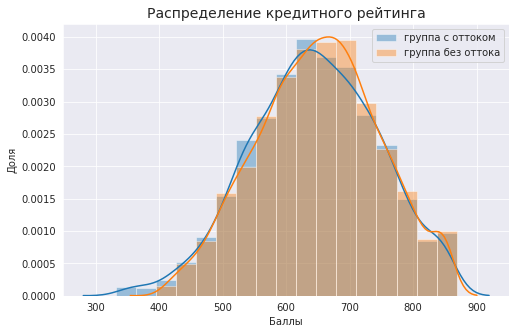

In [20]:
plt.figure(figsize=(8, 5))
fig1 = sns.distplot(churn_clients['credit_score'], kde = True, \
                    bins = np.linspace(start = 300, stop = 900, num = 20), label = 'группа с оттоком') 
fig2 = sns.distplot(nonchurn_clients['credit_score'], kde = True, \
                    bins = np.linspace(start = 300, stop = 900, num = 20), label = 'группа без оттока')  
fig2.set_title("Распределение кредитного рейтинга", fontsize = 14)
fig2.set_ylabel("Доля", fontsize = 10)
fig2.set_xlabel("Баллы")
plt.legend()
plt.show()

Кривые плотностей распределения практически накладываются друг на друга, небольшое различие наблюдается только возле вершины "колоколов": пик графика группы без оттока находится слегка выше и правее пика графика группы с оттоком. Как мы уже видели, среднее значение кредитного рейтинга в группе без оттока немного больше (651,8 против 645,3).

**geography — страна проживания**

В выборке представлены клиенты из трех стран. Половина из Франции и по 25% из Германии и Испании:

In [21]:
print(churn['geography'].unique())
print(churn['geography'].value_counts(normalize = True))

['France' 'Spain' 'Germany']
France     0.5014
Germany    0.2509
Spain      0.2477
Name: geography, dtype: float64


In [22]:
geo = churn.groupby(by = 'geography').agg({'customer_id' : 'count'}).reset_index()\
                         .rename(columns = {'customer_id':'n'}).sort_values(by = 'n', ascending = False)

In [23]:
#вспомогательная функция для отображения процентов на графике
#принимает на вход название графика, сдвиг надписи по горизонтали и по вертикали

def show_percent(figure, shift, height):
    totals = []
    for i in figure.patches:
        totals.append(i.get_height())
    
    total = sum(totals)

    for i in figure.patches:
        figure.text(i.get_x() + shift, i.get_height() + height, \
            str(round((i.get_height() / total) * 100, 2)) + '%', fontsize=12,
                color = 'black')

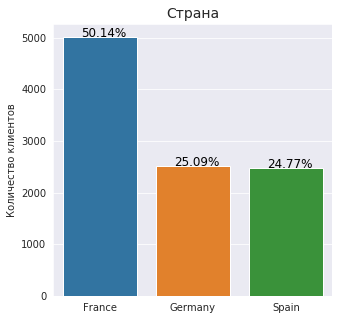

In [24]:
plt.figure(figsize=(5, 5))
fig = sns.barplot(x = "geography", y = "n", data = geo);
fig.set_title("Страна", fontsize = 14)
fig.set_ylabel("Количество клиентов", fontsize = 10)
fig.set_xlabel("")
show_percent(fig, 0.20, 0.01)

Теперь посмотрим, каково соотношение клиентов из разных стран в разрезе оттока:

In [25]:
geo_c = churn_clients.groupby(by = 'geography').agg({'customer_id' : 'count'}).reset_index()\
                         .rename(columns = {'customer_id':'n'})
geo_nc = nonchurn_clients.groupby(by = 'geography').agg({'customer_id' : 'count'}).reset_index()\
                         .rename(columns = {'customer_id':'n'})

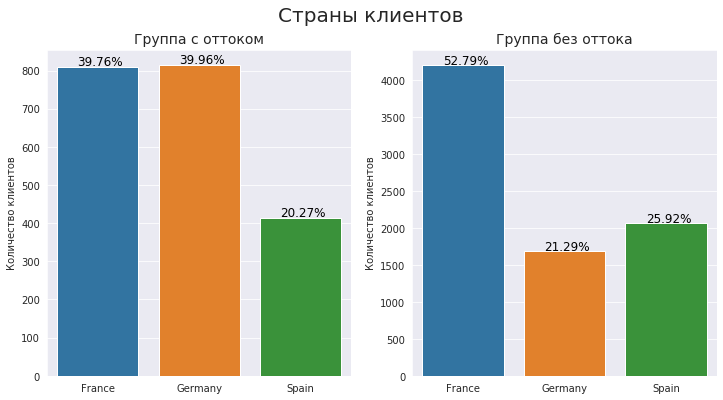

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

fig.suptitle('Страны клиентов', fontsize = 20)

fig1 = sns.barplot(ax = axes[0], x = "geography", y = "n", data = geo_c)
fig1.set_title("Группа с оттоком", fontsize = 14)
fig1.set_ylabel("Количество клиентов", fontsize = 10)
fig1.set_xlabel("")
show_percent(fig1, 0.20, 5)

fig2 = sns.barplot(ax = axes[1], x = "geography", y = "n", data = geo_nc)
fig2.set_title("Группа без оттока", fontsize = 14)
fig2.set_ylabel("Количество клиентов", fontsize = 10)
fig2.set_xlabel("")
show_percent(fig2, 0.20, 10)

plt.show()

В группе с оттоком по 40% клиентов из Франции и Германии, а из Испании только 20%. В группе без оттока 53% составляют клиенты из Франции, 26% из Испании, а меньше всего клиентов из Германии (21%).

**gender — пол**

In [27]:
churn['gender'].value_counts(normalize = True)

Male      0.5457
Female    0.4543
Name: gender, dtype: float64

54,6% выборки - клиенты-мужчины, а 45,4% - соответственно, женщины.

In [28]:
gend_c = churn_clients.groupby(by = 'gender').agg({'customer_id' : 'count'}).reset_index()\
                         .rename(columns = {'customer_id':'n'})
gend_nc = nonchurn_clients.groupby(by = 'gender').agg({'customer_id' : 'count'}).reset_index()\
                         .rename(columns = {'customer_id':'n'})

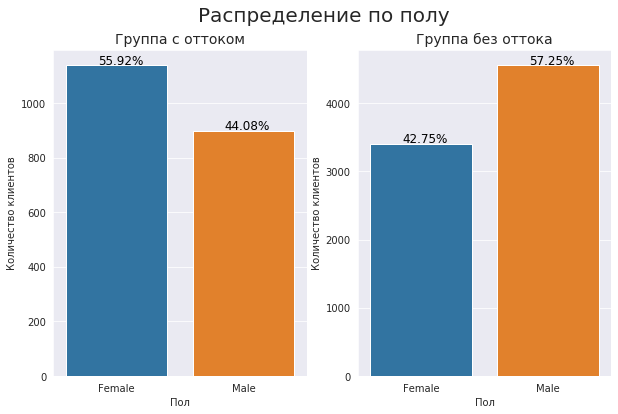

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

fig.suptitle('Распределение по полу', fontsize = 20)

fig1 = sns.barplot(ax = axes[0], x = "gender", y = "n", data = gend_c) 
fig1.set_title("Группа с оттоком", fontsize = 14)
fig1.set_ylabel("Количество клиентов", fontsize = 10)
fig1.set_xlabel("Пол")
show_percent(fig1, 0.25, 5)

fig2 = sns.barplot(ax = axes[1], x = "gender", y = "n", data = gend_nc) 
fig2.set_title("Группа без оттока", fontsize = 14)
fig2.set_ylabel("Количество клиентов", fontsize = 10)
fig2.set_xlabel("Пол")
show_percent(fig2, 0.25, 20)

plt.show()

В группе с оттоком доля женщин выше - 56% против 44% мужчин. В группе без оттока, напротив, больше доля мужчин (57,2%).

**age — возраст**

In [30]:
churn['age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: age, dtype: float64

Самому молодому клиенту 18 лет, а самому возрастному - 92 года. Средний возраст составляет почти 39 лет, стандартное отклонение - 10,5 лет.

Построим график распределения:

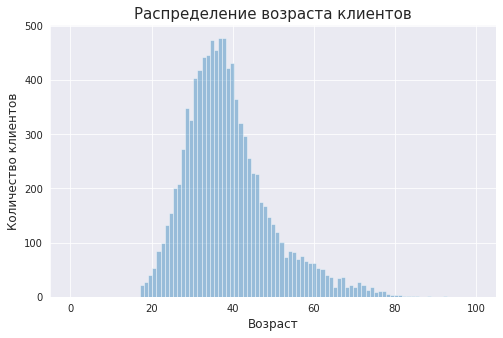

In [31]:
plt.figure(figsize=(8, 5))
fig = sns.distplot(churn['age'], kde = False, bins = np.linspace(start = 0, stop = 100, num = 100))
fig.set_title("Распределение возраста клиентов", fontsize = 15)
fig.set_xlabel("Возраст", fontsize = 12)
fig.set_ylabel("Количество клиентов", fontsize = 12)

plt.show()

Распределение выглядит как нормальное, скошенное вправо. Пожилых клиентов меньше по сравнению с другими возрастными группами.

Среднее значение признака **age** на 7,4 года выше в группе с оттоком:

In [32]:
churn_clients['age'].mean().round(3)

44.838

In [33]:
nonchurn_clients['age'].mean().round(3)

37.408

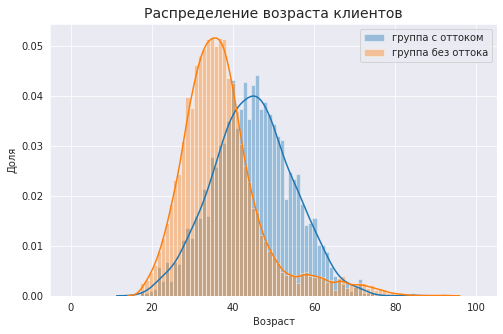

In [34]:
plt.figure(figsize=(8, 5))
fig1 = sns.distplot(churn_clients['age'], kde = True, \
                    bins = np.linspace(start = 0, stop = 100, num = 100), label = 'группа с оттоком') 
fig2 = sns.distplot(nonchurn_clients['age'], kde = True, \
                    bins = np.linspace(start = 0, stop = 100, num = 100), label = 'группа без оттока')  
fig2.set_title("Распределение возраста клиентов", fontsize = 14)
fig2.set_ylabel("Доля", fontsize = 10)
fig2.set_xlabel("Возраст")
plt.legend()
plt.show()

Видно существенное отличие графиков плотностей распределения возраста в группе с оттоком. В группе без оттока, во-первых, меньше среднее значение. Во-вторых, сам "колокол" более узкий, т.е. меньше разброс от среднего. В-третьих, правый край длинный и узкий, т.е. доля людей старшего возраста (примерно от 50 лет) ощутимо ниже в этой группе.

**tenure — сколько лет человек является клиентом банка**

In [35]:
churn['tenure'].describe()

count    9091.000000
mean        4.997690
std         2.894723
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: tenure, dtype: float64

"Стаж" клиентов - от 0 (менее года) до 10 лет. Среднее значение - 5 лет, медиана - 5 лет, стандартное отклонение - 2,9 года.

Построим график распределения:

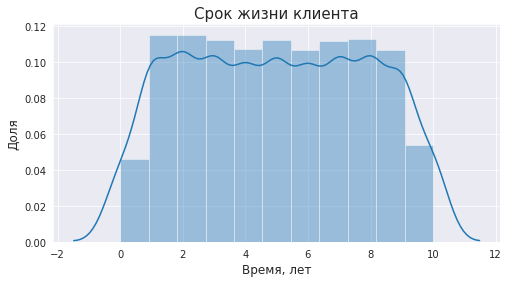

In [36]:
plt.figure(figsize=(8, 4))
fig = sns.distplot(churn['tenure'], kde = True, bins = len(churn['tenure'].unique()) - 1)
fig.set_title("Срок жизни клиента", fontsize = 15)
fig.set_xlabel("Время, лет", fontsize = 12)
fig.set_ylabel("Доля", fontsize = 12)

plt.show()

В рассматриваемом столбце заполнено 9 091 значение (около 91%). Пропусков довольно много, и их необходимо заполнить, иначе в дальнейшем возникнут сложности с кодированием. Удалять 9% строк нежелательно, поскольку это может исказить результат. При этом заполнение пропусков необоснованным образом ухудшит качество данных.

На диаграмме распределения видно, что доля каждого значения от 1 до 9 примерно одинакова - около 10%. На два оставшихся значения - 0 и 10 - приходится по 5%. Заполним пропуски случайным образом, сохранив пропорции.

Доля каждого из значений:

In [37]:
churn['tenure'].value_counts(normalize = True)

1.0     0.104719
2.0     0.104499
8.0     0.102629
3.0     0.102079
5.0     0.101969
7.0     0.101749
4.0     0.097349
9.0     0.097019
6.0     0.096909
10.0    0.049060
0.0     0.042020
Name: tenure, dtype: float64

In [38]:
np.random.seed(0)
churn['tenure'] = churn['tenure'].fillna(pd.Series(np.random.choice(churn.query('~tenure.isna()')['tenure'].unique(), 
                                        p = churn['tenure'].value_counts(normalize = True), size = len(churn['tenure']))))

In [39]:
churn['tenure'].describe()

count    10000.000000
mean         4.994800
std          2.901313
min          0.000000
25%          2.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: tenure, dtype: float64

Пропусков не осталось. Медиана сохранила значение. Среднее, дисперсия и частоты также практически не изменились:

In [40]:
print(churn['tenure'].value_counts(normalize = True))

2.0     0.1050
1.0     0.1045
3.0     0.1030
8.0     0.1022
5.0     0.1016
7.0     0.1005
4.0     0.0982
6.0     0.0966
9.0     0.0932
10.0    0.0531
0.0     0.0421
Name: tenure, dtype: float64


Среднее значение признака **tenure** незначительно выше в группе без оттока:

In [41]:
churn_clients['tenure'].mean().round(3)

4.902

In [42]:
nonchurn_clients['tenure'].mean().round(3)

5.022

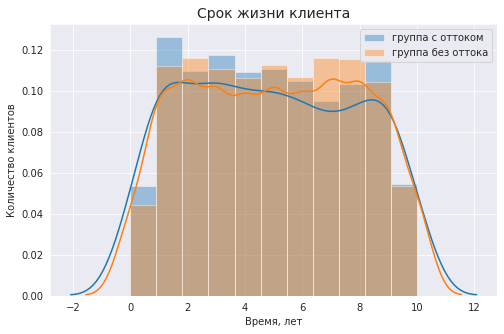

In [43]:
plt.figure(figsize=(8, 5))
fig1 = sns.distplot(churn_clients['tenure'], kde = True, bins = len(churn['tenure'].unique()), label = 'группа с оттоком') 
fig2 = sns.distplot(nonchurn_clients['tenure'], kde = True, bins = len(churn['tenure'].unique()), label = 'группа без оттока')  
fig2.set_title("Срок жизни клиента", fontsize = 14)
fig2.set_ylabel("Количество клиентов", fontsize = 10)
fig2.set_xlabel("Время, лет")
plt.legend()
plt.show()

Распределения выглядят очень похоже. В группе без оттока больше доли клиентов, обслуживающихся в банке 7 и 8 лет. В группе с оттоком выше доля клиентов, обслуживающихся менее двух лет, а также 9 лет.

**balance — баланс на счёте**

In [44]:
churn['balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: balance, dtype: float64

Минимальное значение остатка - 0, максимальное - 250 898. Аномальных значений нет. Среднее значение - 76 486, медианное - 97 199. Стандартное отклонение - 62 397.

Построим график распределения:

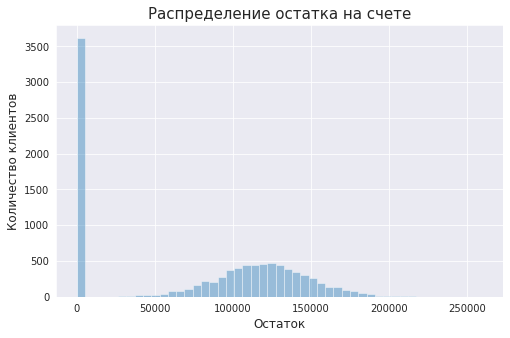

In [45]:
plt.figure(figsize=(8, 5))
fig = sns.distplot(churn['balance'], kde = False, bins = np.linspace(start = 0, stop = 260000, num = 50))
fig.set_title("Распределение остатка на счете", fontsize = 15)
fig.set_xlabel("Остаток", fontsize = 12)
fig.set_ylabel("Количество клиентов", fontsize = 12)

plt.show()

В целом распределение визуально выглядит как нормальное, если отбросить 36% нулевых значений:

In [46]:
churn.query('balance == 0')['customer_id'].count()

3617

Среднее значение признака **balance** существенно больше в группе с оттоком:

In [47]:
churn_clients['balance'].mean().round(3)

91108.539

In [48]:
nonchurn_clients['balance'].mean().round(3)

72745.297

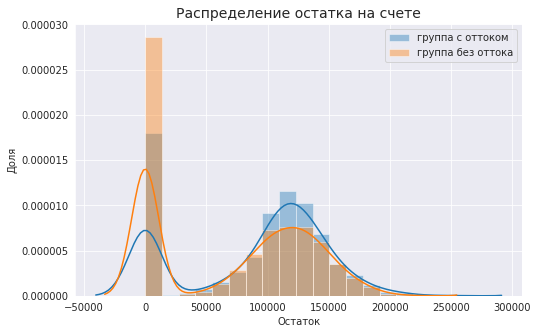

In [49]:
plt.figure(figsize=(8, 5))
fig1 = sns.distplot(churn_clients['balance'], kde = True, \
                    bins = np.linspace(start = 0, stop = 260000, num = 20), label = 'группа с оттоком') 
fig2 = sns.distplot(nonchurn_clients['balance'], kde = True, \
                    bins = np.linspace(start = 0, stop = 260000, num = 20), label = 'группа без оттока')  
fig2.set_title("Распределение остатка на счете", fontsize = 14)
fig2.set_ylabel("Доля", fontsize = 10)
fig2.set_xlabel("Остаток")
plt.legend()
plt.show()

Характер распределений одинаков, однако доля клиентов с нулевыми остатками значительно больше в группе без оттока. На основной части графика пик, соответствующий средним значениям, выше для группы с оттоком. Возможно, группа без оттока содержит клиентов, которые перестали пользоваться услугами банка и увели деньги со счета, но договор с банком не расторгли и поэтому формально остались клиентами. 

Если не брать в расчет клиентов с нулевыми остатками, среднее значение для обеих групп примерно одинаково:

In [50]:
print(churn_clients.query('balance != 0')['balance'].mean().round(3))
print(nonchurn_clients.query('balance != 0')['balance'].mean().round(3))

120746.971
119535.864


**num_of_products — количество продуктов банка, используемых клиентом**

In [51]:
churn['num_of_products'].describe()

count    10000.000000
mean         1.530200
std          0.581654
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: num_of_products, dtype: float64

Минимальное количество продуктов, которыми пользуется клиент, - 1, максимальное - 4, среднее - 1,5, медианное - 1. Стандартное отклонение - 0,58.

Построим график распределения:

In [52]:
prod = churn.groupby(by = 'num_of_products').agg({'customer_id' : 'count'}).reset_index()\
                         .rename(columns = {'customer_id':'n'}).sort_values(by = 'n', ascending = False)

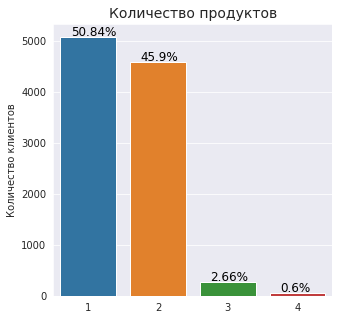

In [53]:
plt.figure(figsize=(5, 5))
fig = sns.barplot(x = "num_of_products", y = "n", data = prod) 
fig.set_title("Количество продуктов", fontsize = 14)
fig.set_ylabel("Количество клиентов", fontsize = 10)
fig.set_xlabel("")
show_percent(fig, 0.15, 20)

У половины клиентов оформлен только один продукт, еще у 46% - 2. Незначительное количество пользуется тремя или четырьмя продуктами.

Среднее значение признака **num_of_products** незначительно отличается в пользу группы без оттока:

In [54]:
churn_clients['num_of_products'].mean().round(3)

1.475

In [55]:
nonchurn_clients['num_of_products'].mean().round(3)

1.544

In [56]:
prod_c = churn_clients.groupby(by = 'num_of_products').agg({'customer_id' : 'count'}).reset_index()\
                         .rename(columns = {'customer_id':'n'})
prod_nc = nonchurn_clients.groupby(by = 'num_of_products').agg({'customer_id' : 'count'}).reset_index()\
                         .rename(columns = {'customer_id':'n'})

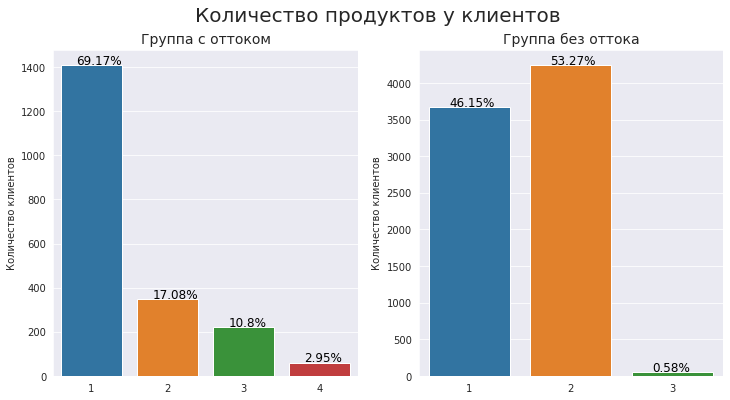

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

fig.suptitle('Количество продуктов у клиентов', fontsize = 20)

fig1 = sns.barplot(ax = axes[0], x = "num_of_products", y = "n", data = prod_c) 
fig1.set_title("Группа с оттоком", fontsize = 14)
fig1.set_ylabel("Количество клиентов", fontsize = 10)
fig1.set_xlabel("")
show_percent(fig1, 0.2, 5)

fig2 = sns.barplot(ax = axes[1], x = "num_of_products", y = "n", data = prod_nc) 
fig2.set_title("Группа без оттока", fontsize = 14)
fig2.set_ylabel("Количество клиентов", fontsize = 10)
fig2.set_xlabel("")
show_percent(fig2, 0.2, 10)

plt.show()

Подавляющее большинство клиентов (69%) в группе с оттоком пользуется только одним продуктом. В группе без оттока, напротив, 53% используют 2 продукта. В последнюю практически не попали клиенты с тремя или четырьмя продуктами. Вероятно, это можно объяснить тем, что доля таких клиентов в целом очень мала. Вообще говоря, большее количество продуктов сильнее привязывает клиента к сервисам банка.

**has_cr_card — наличие кредитной карты**

In [58]:
churn['has_cr_card'].value_counts(normalize = True)

1    0.7055
0    0.2945
Name: has_cr_card, dtype: float64

70,5% клиентов из выборки имеют кредитные карты.

Средние значения признака **has_cr_card** в группах с оттоком и без оттока практически не отличаются:

In [59]:
churn_clients['has_cr_card'].mean().round(3)

0.699

In [60]:
nonchurn_clients['has_cr_card'].mean().round(3)

0.707

In [61]:
cards_c = churn_clients.groupby(by = 'has_cr_card').agg({'customer_id' : 'count'}).reset_index()\
                         .rename(columns = {'customer_id':'n'})
cards_nc = nonchurn_clients.groupby(by = 'has_cr_card').agg({'customer_id' : 'count'}).reset_index()\
                         .rename(columns = {'customer_id':'n'})
cards_c['label'] = ['Нет' if (i == 0) else 'Да' for i in cards_c['has_cr_card']]
cards_nc['label'] = ['Нет' if (i == 0) else 'Да' for i in cards_nc['has_cr_card']]

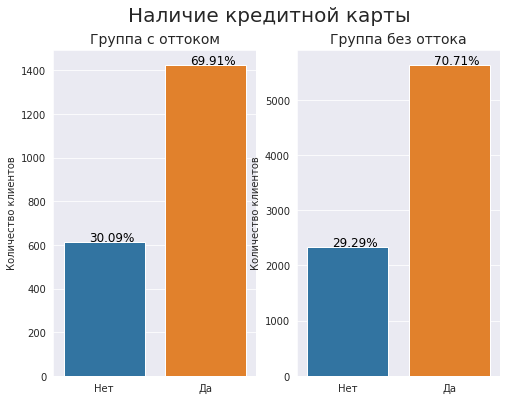

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(8, 6))

fig.suptitle('Наличие кредитной карты', fontsize = 20)

fig1 = sns.barplot(ax = axes[0], x = "label", y = "n", data = cards_c) 
fig1.set_title("Группа с оттоком", fontsize = 14)
fig1.set_ylabel("Количество клиентов", fontsize = 10)
fig1.set_xlabel("")
show_percent(fig1, 0.25, 5)

fig2 = sns.barplot(ax = axes[1], x = "label", y = "n", data = cards_nc) 
fig2.set_title("Группа без оттока", fontsize = 14)
fig2.set_ylabel("Количество клиентов", fontsize = 10)
fig2.set_xlabel("")
show_percent(fig2, 0.25, 20)

plt.show()

Распределения идентичны для обеих групп.

**is_active_member — активность клиента**

In [63]:
churn['is_active_member'].value_counts(normalize = True)

1    0.5151
0    0.4849
Name: is_active_member, dtype: float64

51,5% клиентов являются активными.

Средние значения признака **is_active_member** в группах с оттоком и без оттока существенно отличаются:

In [64]:
churn_clients['is_active_member'].mean().round(3)

0.361

In [65]:
nonchurn_clients['is_active_member'].mean().round(3)

0.555

In [66]:
lo_c = churn_clients.groupby(by = 'is_active_member').agg({'customer_id' : 'count'}).reset_index()\
                         .rename(columns = {'customer_id':'n'})
lo_nc = nonchurn_clients.groupby(by = 'is_active_member').agg({'customer_id' : 'count'}).reset_index()\
                         .rename(columns = {'customer_id':'n'})
lo_c['label'] = ['Нет' if (i == 0) else 'Да' for i in lo_c['is_active_member']]
lo_nc['label'] = ['Нет' if (i == 0) else 'Да' for i in lo_nc['is_active_member']]

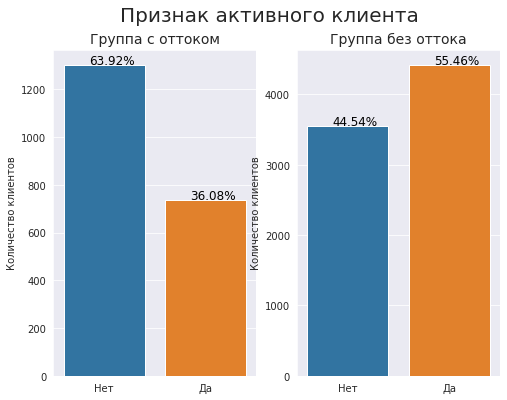

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(8, 6))

fig.suptitle('Признак активного клиента', fontsize = 20)

fig1 = sns.barplot(ax = axes[0], x = "label", y = "n", data = lo_c) 
fig1.set_title("Группа с оттоком", fontsize = 14)
fig1.set_ylabel("Количество клиентов", fontsize = 10)
fig1.set_xlabel("")
show_percent(fig1, 0.25, 5)

fig2 = sns.barplot(ax = axes[1], x = "label", y = "n", data = lo_nc) 
fig2.set_title("Группа без оттока", fontsize = 14)
fig2.set_ylabel("Количество клиентов", fontsize = 10)
fig2.set_xlabel("")
show_percent(fig2, 0.25, 20)

plt.show()

В группе без оттока доля активных клиентов преобладает - 55,5%. В группе с оттоком она значительно меньше - всего 36%.

**estimated_salary — предполагаемая зарплата**

In [68]:
churn['estimated_salary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: estimated_salary, dtype: float64

Минимальное значение зарплаты - 11,6, максимальное - 199 992,5. Нижняя граница выглядит неправдоподобной. Из предоставленных данных неясно, каким образом определяется показатель, кроме очевидного случая, когда клиент получает напрямую зарплату на карту в банке заказчика. Возможно, при расчете показателя учитывались поступления на счет, приходящие с определенной периодичностью, тогда под заработной платой стоит понимать пенсию или пособия. Посмотрим, сколько в датасете клиентов с низкими значениями показателя (менее [пособия по безработице](https://spainru.com/immigraciia-v-ispaniiu/kak-oformit-posobie-po-bezrabotitse-v-ispanii/) в самой бедной из представленных стран - Испании): 

In [69]:
churn.query('estimated_salary < 452')['customer_id'].count()

20

Таких всего 0,2% от общего количества, что не искажает общую картину, даже если показатель ошибочно занижен. 

Вообще говоря, данные выглядят недостоверными, поскольку средняя **годовая** зарплата в самой богатой из рассматриваемых стран - Германии - [составляет 57 000 евро](https://www.study-in-germany.ru/post/%D0%B7%D0%B0%D1%80%D0%BF%D0%BB%D0%B0%D1%82%D1%8B-%D0%B2-%D0%B3%D0%B5%D1%80%D0%BC%D0%B0%D0%BD%D0%B8%D0%B8-%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5-2021-%D0%B3%D0%BE%D0%B4%D0%B0). В нашем датасете она ровно вдвое выше. Однако оставим этот вопрос на совести тех, кто агрегировал данные.

Средний размер зарплаты - 100 090,2, он совпадает с медианным - 100 193,9. Стандартное отклонение - 57 510,5.

Построим график распределения:

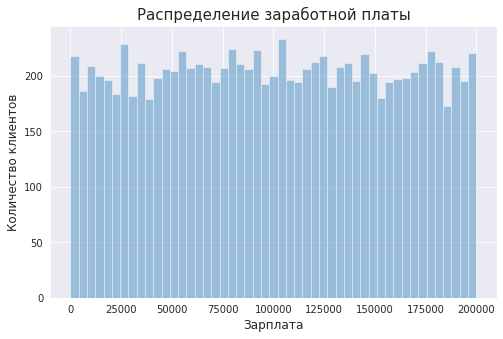

In [70]:
plt.figure(figsize=(8, 5))
sns.set_style("darkgrid")
fig = sns.distplot(churn['estimated_salary'], kde = False, bins = np.linspace(start = 0, stop = 200000, num = 50))
fig.set_title("Распределение заработной платы", fontsize = 15)
fig.set_xlabel("Зарплата", fontsize = 12)
fig.set_ylabel("Количество клиентов", fontsize = 12)

plt.show()

Распределение зарплаты не похоже на нормальное. В рассматриваемой выборке количество клиентов, получающих зарплату в том или ином сегменте, примерно одинаковое для каждого такого сегмента.

Среднее значение признака **estimated_salary** незначительно выше в группе с оттоком:

In [71]:
churn_clients['estimated_salary'].mean().round(3)

101465.678

In [72]:
nonchurn_clients['estimated_salary'].mean().round(3)

99738.392

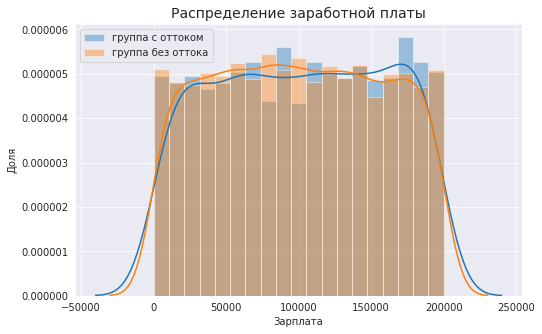

In [73]:
plt.figure(figsize=(8, 5))
fig1 = sns.distplot(churn_clients['estimated_salary'], kde = True, \
                    bins = np.linspace(start = 0, stop = 200000, num = 20), label = 'группа с оттоком') 
fig2 = sns.distplot(nonchurn_clients['estimated_salary'], kde = True, \
                    bins = np.linspace(start = 0, stop = 200000, num = 20), label = 'группа без оттока')  
fig2.set_title("Распределение заработной платы", fontsize = 14)
fig2.set_ylabel("Доля", fontsize = 10)
fig2.set_xlabel("Зарплата")
plt.legend()
plt.show()

Распределения выглядят практически идентично, существенной разницы между группами нет.

---

После проведения анализа признаков удалим не требующийся далее для прогнозирования столбец **customer_id**:

In [74]:
churn_mod = churn.drop(['customer_id'] , axis = 1)

**Вывод**

В ходе предварительного анализа было выявлено следующее:
- группа клиентов в оттоке составляет 20% от всей выборки; 
- демографические признаки (пол, возраст, страна проживания) чаще оказывают влияние на отток, чем экономические. Так, группа с оттоком практически не отличается от группы без оттока по доле клиентов, имеющих кредитную карту, по распределению зарплат, кредитного рейтинга, времени обслуживания в банке;
- из экономических параметров только два - число продуктов банка у клиента и активность - оказывают влияние на отток.

Сравнивая средние значения в группах с оттоком и без, можно заметить ощутимую разницу для следующих признаков:

- пол (в группе без оттока больше мужчин (57% против 44% в группе с оттоком));
- возраст (клиенты в группе без оттока моложе (средний возраст 37,4 года против 44,8 лет));
- активность (выше в группе без оттока (55% против 36%));
- страна (доля жителей Франции существенно выше в группе без оттока, а жителей Германии - напротив, в группе с оттоком).

О степени влияния рассмотренных показателей речь пойдет ниже.

### Прямое кодирование

Посмотрим еще раз на датафрейм:

In [75]:
churn_mod.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Два из рассматриваемых признаков - **geography** и **gender** -  являются категориальными и представлены в текстовом виде. Для обучения модели и решения задачи прогнозирования требуется перевести их в числовую форму. Будем использовать для этого прямое кодирование. Чтобы избавиться от линейной зависимости получившихся столбцов, удалим по одной колонке с помощью параметра *drop_first*:

In [76]:
churn_mod = pd.get_dummies(churn_mod, columns = ['geography', 'gender'], drop_first = True)

In [77]:
churn_mod.columns = churn_mod.columns.str.lower()
churn_mod.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_germany,geography_spain,gender_male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


Теперь все признаки представлены в числовом формате.

### Корреляция признаков

Проверим, есть ли среди признаков коллинеарные. Если таковые найдутся, примем решение об исключении их из датасета, чтобы не утяжелять модель. 

Так как матрица корреляции подходит для оценки только количественных переменных, возьмем соответствующую часть датафрейма:

In [78]:
churn_mod_num = churn_mod[['credit_score', 'age', 'balance', 'estimated_salary']]
feat_num = ['кредитный рейтинг', 'возраст', 'остаток на счете', 'зарплата']
cmn = churn_mod_num.corr()

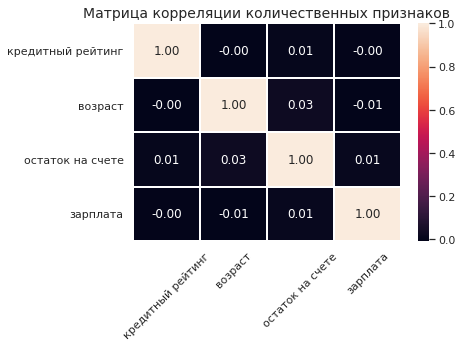

In [79]:
sns.set(style = 'white')
plt.figure(figsize = (6, 4))
plt.title('Матрица корреляции количественных признаков', fontsize = 14)
ax = sns.heatmap(cmn, annot = True, linewidths = 1, linecolor = 'white', fmt = '.2f', xticklabels = feat_num,\
                 yticklabels = feat_num)
plt.xticks(rotation = 45) 
plt.show()

Как видно, количественные признаки не коррелируют между собой.

Для отображения взаимосвязей между категориальными признаками воспользуемся коэффициентом Крамера. Функция позаимствована с сайта [https://towardsdatascience.com/](https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9). 


In [82]:
# функция вычисляет статистику Cramers V для категориальных переменных x и y на основе критерия Пирсона;
# это аналог коэффицента корреляции

def cramers(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = st.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))


Вычислим коэффициенты взаимосвязи для каждой пары переменных и отразим на тепловой карте:

In [83]:
churn_mod_cat = churn_mod[['tenure', 'num_of_products', 'has_cr_card', \
                           'is_active_member', 'geography_germany', 'geography_spain', 'gender_male', 'exited']]
feat_cat = ['срок жизни', 'число продуктов', 'наличие кредитной карты', 'активность', \
           'житель Германии', 'житель Испании', 'мужчина', 'отток']

In [84]:
hm = [[0 for i in range(len(churn_mod_cat.columns))] for j in range(len(churn_mod_cat.columns))]
for i in range(len(churn_mod_cat.columns)):
    for j in range(len(churn_mod_cat.columns)):
        hm[i][j] = cramers(churn_mod_cat[churn_mod_cat.columns[i]], churn_mod_cat[churn_mod_cat.columns[j]])

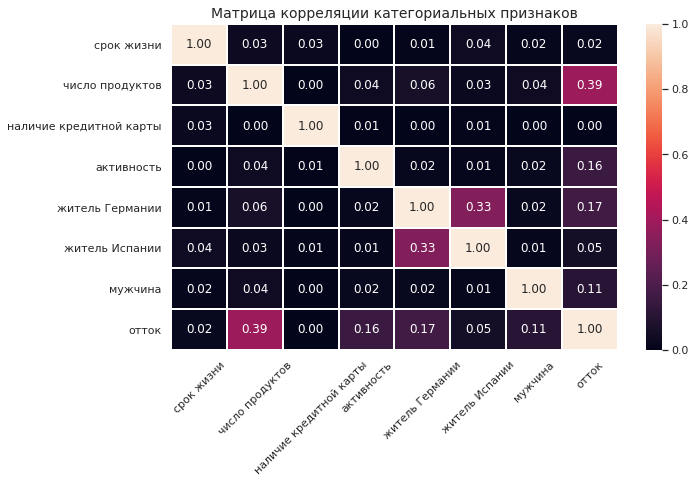

In [85]:
sns.set(style = 'white')
plt.figure(figsize = (10, 6))
plt.title('Матрица корреляции категориальных признаков', fontsize = 14)
ax = sns.heatmap(hm, annot = True, linewidths = 1, linecolor = 'white', fmt = '.2f', xticklabels = feat_cat,\
                 yticklabels = feat_cat)
plt.xticks(rotation = 45) 
plt.show()

Сильных зависимостей между категориальными признаками нет. Есть умеренная взаимосвязь между целевой переменной оттока и количеством продуктов у клиента (этот результат был получен выше), а также между переменными, характеризующими страну клиента, что логично, ведь они были выделены из общего столбца в результате прямого кодирования.

**Вывод**

Коллинеарных признаков в датасете не выявлено. В части категориальных переменных наблюдается умеренная взаимосвязь между оттоком и количеством продуктов у клиента, а также между переменными, характеризующими страну клиента, что обусловлено построением указанных переменных.

### Разбивка данных на выборки

Целевой признак в рассматриваемой задаче - это показатель оттока:

In [86]:
target = churn_mod['exited']
features = churn_mod.drop('exited', axis = 1)

Разделим данные на обучающую, валидационную и тестовую выборки в пропорции 60:20:20 соответственно:

In [87]:
features_train, features_valid, target_train, target_valid = \
                                    train_test_split(features, target, test_size = 0.4, random_state = 12345)
features_valid, features_test, target_valid, target_test = \
                                    train_test_split(features_valid, target_valid, test_size = 0.5, random_state = 12345)


Размерность выборок удовлетворяет указанным выше пропорциям:

In [88]:
display(features_train.shape, target_train.shape[0])
display(features_valid.shape, target_valid.shape[0])
display(features_test.shape, target_test.shape[0])

(6000, 11)

6000

(2000, 11)

2000

(2000, 11)

2000

### Масштабирование признаков

Рассматриваемые переменные имеют разный масштаб. Чтобы модель корректно проводила оценку параметров, настроим стандартизацию на обучающей выборке и преобразуем все выборки:

In [89]:
scaler = StandardScaler()
scaler.fit(features_train) 

features_train_st = scaler.transform(features_train)
features_valid_st = scaler.transform(features_valid) 
features_test_st = scaler.transform(features_test) 

### Вывод

Данные подготовлены к анализу:
- дубликаты отсутствуют;
- удалены признаки **row_number**, **customer_id** и **surname**, не требующиеся для построения модели прогнозирования;
- пропущенные значения в столбце **tenure** восстановлены;
- проведен исследовательский анализ каждого признака в разрезе целевой переменной:
    - группа клиентов в оттоке составляет 20% от всей выборки;
    - сильнее всего на отток влияют демографические признаки (пол, возраст, страна проживания). Из экономических параметров оказывают влияние только два - число продуктов банка у клиента и его активность;
    - в группе без оттока больше мужчин (57% против 44%);
    - клиенты в группе без оттока моложе (средний возраст 37,4 года против 44,8 лет);
    - активность выше в группе без оттока (55% против 36%);
    - в группе без оттока существенно выше доля жителей Франции, а в группе с оттоком - Германии;
- рассчитаны коэффициенты корреляции между переменными. Нельзя сделать вывод о наличии сильной зависимости между признаками;
- данные разбиты на обучающую, валидационную и тестовую выборки в пропорции 60:20:20;
- признаки масштабированы.

## Исследование задачи

Как упоминалось выше, доля клиентов с оттоком в датасете составляет 20% от всей выборки, что говорит об имеющемся дисбалансе классов.

Сначала построим модели на имеющихся выборках без учета дисбаланса классов и оценим их. Если качество окажется низким, устраним дисбаланс. Поскольку требуется спрогнозировать качественный признак - попал клиент в отток или нет, - будем использовать модели для решения задачи классификации: решающее дерево, случайный лес и логистическую регрессию.

###  Построение моделей

**Модель логистической регрессии**

Обучим модель на тренировочной выборке и проверим ее качество на валидационной выборке (как на полном датасете, так и с удаленным столбцом):

In [91]:
# функция принимает на вход четыре выборки (на первых двух обучает, на последних тестирует качество), 
# а также параметр, отвечающий за взвешивание классов (0 - нет, 1 - да)

# возвращает название модели, маркер взвешивания классов, f1, auc-roc, accuracy, 
# а также два пустых значения для удобного отображения итоговой таблицы

def lr(f_train, t_train, f_val, t_val, cw):
    
    if cw == 0:
        model_lr = LogisticRegression(random_state = 12345, solver = 'liblinear')
    if cw == 1:  
        model_lr = LogisticRegression(random_state = 12345, solver = 'liblinear', class_weight = 'balanced')
    model_lr.fit(f_train, t_train)
    predicted_valid = model_lr.predict(f_val)
    probabilities_valid = model_lr.predict_proba(f_val)
    probabilities_one_valid = probabilities_valid[:, 1]
    
    model = 'LogisticRegression'
    f1 = f1_score(t_val, predicted_valid).round(5)
    accuracy = accuracy_score(t_val, predicted_valid).round(5)
    auc_roc = roc_auc_score(t_val, probabilities_one_valid).round(5)
    depth = None
    num_trees = None
    
    return model, cw, f1, accuracy, auc_roc, depth, num_trees

Для удобства дальнейшей визуализации запишем результаты работы функции в датафрейм:

In [92]:
answers = pd.DataFrame([], columns = ['model', 'class-weight', 'f1', 'accuracy', 'auc-roc', 'depth', 'num_trees'])

In [93]:
answers.loc[0] = lr(features_train_st, target_train, features_valid_st, target_valid, 0)
answers.head()

,model,class-weight,f1,accuracy,auc-roc,depth,num_trees
0,LogisticRegression,0,0.33613,0.8025,0.75866,None,None


**Модель решающего дерева**

Обучим модель и проверим ее качество на тех же выборках. Гиперпараметр модели - глубину дерева - передадим функции в качестве параметра:

In [94]:
# функция принимает на вход четыре выборки (на первых двух обучает, на последних тестирует качество), 
# а также максимальную глубину дерева и параметр, отвечающий за взвешивание классов (0 - нет, 1 - да)

# возвращает название модели, маркер взвешивания классов, лучшее значение f1, auc-roc, accuracy, 
# оптимальную глубину, а также пустое значенияе для удобного отображения итоговой таблицы

def dt(f_train, t_train, f_val, t_val, d, cw):

    best_model = None
    best_result = 0
    best_depth = 0
    for depth in range(1, d + 1):
        if cw == 0:
            model_dt = DecisionTreeClassifier(max_depth = depth, random_state = 12345)
        if cw == 1: 
            model_dt = DecisionTreeClassifier(max_depth = depth, random_state = 12345, class_weight = 'balanced')
        model_dt.fit(f_train, t_train) 
        predictions_valid = model_dt.predict(f_val)
        probabilities_valid = model_dt.predict_proba(f_val)
        probabilities_one_valid = probabilities_valid[:, 1]
        result = f1_score(t_val, predictions_valid).round(5)

        if result > best_result:
            best_model = model_dt 
            best_result = result 
            best_depth = depth
            best_pred_val = predictions_valid
            best_prob_one_val = probabilities_one_valid

    model = 'DecisionTree'
    f1 = best_result
    accuracy = accuracy_score(t_val, best_pred_val).round(5)
    auc_roc = roc_auc_score(t_val, best_prob_one_val).round(5)
    depth = best_depth
    num_trees = None
    
    return model, cw, f1, accuracy, auc_roc, depth, num_trees        

Посмотрим, на каком из значений глубины модель даст лучший результат F1-меры:

In [95]:
answers.loc[1] = list(dt(features_train_st, target_train, features_valid_st, target_valid, 20, 0))
answers.head()

,model,class-weight,f1,accuracy,auc-roc,depth,num_trees
0,LogisticRegression,0,0.33613,0.8025,0.75866,None,None
1,DecisionTree,0,0.57186,0.8585,0.81721,6,None


**Модель случайного леса**

Напишем аналогичную функцию, а в качестве параметра будем передавать не только глубину, но и количество деревьев.

In [96]:
# функция принимает на вход четыре выборки (на первых обучает, на последних тестирует качество), 
# а также глубину, максимальное число деревьев и параметр, отвечающий за взвешивание классов (0 - нет, 1 - да)

# возвращает название модели, маркер взвешивания классов, лучшее значение f1, auc-roc, accuracy, 
# оптимальную глубину и оптимальное количество деревьев

def rf(f_train, t_train, f_val, t_val, d, n_est, cw):

    best_model = None
    best_result = 0
    best_n_est = 0
    for est in range(1, n_est + 1):
        for depth in range(1, d + 1):
            if cw == 0:
                model_rf = RandomForestClassifier(random_state = 12345, n_estimators = est, max_depth = depth)
            if cw == 1: 
                model_rf = RandomForestClassifier(random_state = 12345, n_estimators = est, max_depth = depth,\
                                                  class_weight = 'balanced')
            model_rf.fit(f_train, t_train) 
            predictions_valid = model_rf.predict(f_val)
            probabilities_valid = model_rf.predict_proba(f_val)
            probabilities_one_valid = probabilities_valid[:, 1]
            result = f1_score(t_val, predictions_valid).round(5)
        
            if result > best_result:
                best_model = model_rf 
                best_result = result 
                best_n_est = est
                best_depth = depth
                best_pred_val = predictions_valid
                best_prob_one_val = probabilities_one_valid

    model = 'RandomForest'
    f1 = best_result
    accuracy = accuracy_score(t_val, best_pred_val).round(5)
    auc_roc = roc_auc_score(t_val, best_prob_one_val).round(5)
    depth = best_depth
    num_trees = best_n_est
    
    return model, cw, f1, accuracy, auc_roc, depth, num_trees               

Определим, при каких параметрах глубины и числа деревьев достигается максимальное значение F1:

In [97]:
answers.loc[2] = list(rf(features_train_st, target_train, features_valid_st, target_valid, 15, 50, 0))
answers.head()

,model,class-weight,f1,accuracy,auc-roc,depth,num_trees
0,LogisticRegression,0,0.33613,0.8025,0.75866,None,None
1,DecisionTree,0,0.57186,0.8585,0.81721,6,None
2,RandomForest,0,0.60029,0.8635,0.82688,12,9


### Проверка моделей на адекватность

Будем считать, что модель адекватна, если ее прогноз лучше, чем доля правильных ответов у константной модели, рассчитанная только на основании знания пропорций в исходной выборке.

In [98]:
round(churn['exited'].value_counts(normalize=True), 5)

0    0.7963
1    0.2037
Name: exited, dtype: float64

Доля пользователей с оттоком в выборке составляет 0,2037. Классифицируя любого случайного клиента как неотточного, мы сделаем верное предположение в 79,6% случаев.

Модель логистической регрессии дает результат, сравнимый с работой константной модели. Доля правильных ответов моделей решающего дерева и случайного леса выше на 6 и 7% соответственно. Таким образом, они проходят проверку на адекватность.

### Вывод

Для решения задачи классификации построены три модели: логистической регрессии, решающего дерева и случайного леса. Модели обучены на стандартизированной тренировочной выборке; качество проверено на валидационной выборке.

- лучшее значение F1-меры показала **модель случайного леса** с числом деревьев 9 и глубиной 12: **0,60029**.
- промежуточный результат у **модели решающего дерева** с глубиной 6: **0,57186**.
- ниже всего показатель у **модели логистической регрессии**: **0.33613**.

Модель логистической регрессии заметно уступает остальным и по другим метрикам - accuracy и AUC-ROC. **Модель случайного леса** показала лучшие результаты на всех метриках (accuracy - 0,8635, AUC-ROC - 0,8268).

Проверку на адекватность прошли модели решающего дерева и случайного леса. 

Требуемое по условию минимальное значение метрики F1 (0,59) достигнуто только на модели случайного леса (0,60). Проверим, улучшится ли результат после избавления от дисбаланса классов.

## Борьба с дисбалансом

Существуют разные способы устранения дисбаланса классов. Будем использовать взвешивание классов и *upsampling*.

### Взвешивание классов

Вызовем функции на тех же выборках, воспользовавшись параметром *class_weight = 'balanced'* для каждой модели:

In [99]:
answers.loc[3] = list(lr(features_train_st, target_train, features_valid_st, target_valid, 1))
answers.loc[4] = list(dt(features_train_st, target_train, features_valid_st, target_valid, 20, 1))
answers.loc[5] = list(rf(features_train_st, target_train, features_valid_st, target_valid, 15, 50, 1))
answers.head(10)

,model,class-weight,f1,accuracy,auc-roc,depth,num_trees
0,LogisticRegression,0,0.33613,0.8025,0.75866,None,None
1,DecisionTree,0,0.57186,0.8585,0.81721,6,None
2,RandomForest,0,0.60029,0.8635,0.82688,12,9
3,LogisticRegression,1,0.48843,0.7015,0.76360,None,None
4,DecisionTree,1,0.59638,0.8105,0.83102,5,None
5,RandomForest,1,0.63023,0.8275,0.85464,7,47


Для всех моделей выросло значения метрик F1, особенно сильно для логистической регрессии (с 0,336 до 0,488). Модель решающего дерева теперь тоже удовлетворяет условию задачи (F1 > 0,59). Модель случайного леса по-прежнему показывает лучшие результаты по всем метрикам.

Стоит отметить, что показатель доли точных ответов accuracy для каждой из моделей заметно снизился, хотя решающее дерево и случайный лес все еще работают адекватнее, чем константная модель.

### Upsampling

Теперь воспользуемся другим способом балансирования классов - увеличением выборки более редкого класса. Напишем функцию, которая копирует несколько раз положительные объекты, создает новую тренировочную выборку и перемешивает ее:

In [100]:
# функция принимает на вход признаки, целевую переменную и параметр, отвечающий за количество копирований части датасета
# на выходе получаем увеличенные выборки

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = np.concatenate([features_zeros] + [features_ones] * repeat)
    target_upsampled = np.concatenate([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state = 12345)
    
    return features_upsampled, target_upsampled

Воспользуемся функцией для получения новых обучающих выборок:

In [101]:
features_upsampled, target_upsampled = upsample(features_train_st, target_train, 10)

Размер новых выборок:

In [102]:
print(features_upsampled.shape)
print(target_upsampled.shape)

(16764, 11)
(16764,)


Обучим модели на полученных выборках:

In [103]:
answers.loc[6] = lr(features_upsampled, target_upsampled, features_valid_st, target_valid, 0)
answers.loc[7] = dt(features_upsampled, target_upsampled, features_valid_st, target_valid, 20, 0)
answers.loc[8] = rf(features_upsampled, target_upsampled, features_valid_st, target_valid, 15, 50, 0)
answers.head(10)

,model,class-weight,f1,accuracy,auc-roc,depth,num_trees
0,LogisticRegression,0,0.33613,0.8025,0.75866,None,None
1,DecisionTree,0,0.57186,0.8585,0.81721,6,None
2,RandomForest,0,0.60029,0.8635,0.82688,12,9
3,LogisticRegression,1,0.48843,0.7015,0.76360,None,None
4,DecisionTree,1,0.59638,0.8105,0.83102,5,None
5,RandomForest,1,0.63023,0.8275,0.85464,7,47
6,LogisticRegression,0,0.41983,0.4735,0.76509,None,None
7,DecisionTree,0,0.52407,0.6985,0.80803,7,None
8,RandomForest,0,0.60735,0.8345,0.83680,15,50


Как видно, при увеличении выборки результат получился значительно хуже, чем при взвешивании классов. Значение F1 для решающего дерева стало даже меньше, чем при несбалансированной выборке. Для случайного леса оно осталось таким же, как и на несбалансированной выборке.

Наконец, посторим модели, используя одновременно и взвешивание классов, и увеличение выборки:

In [104]:
answers.loc[9] = lr(features_upsampled, target_upsampled, features_valid_st, target_valid, 1)
answers.loc[10] = dt(features_upsampled, target_upsampled, features_valid_st, target_valid, 20, 1)
answers.loc[11] = rf(features_upsampled, target_upsampled, features_valid_st, target_valid, 15, 50, 1)

In [105]:
answers['upsample'] = [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
answers.sort_values('f1', ascending = False)

,model,class-weight,f1,accuracy,auc-roc,depth,num_trees,upsample
11,RandomForest,1,0.63853,0.8330,0.85100,10,46,1
5,RandomForest,1,0.63023,0.8275,0.85464,7,47,0
8,RandomForest,0,0.60735,0.8345,0.83680,15,50,1
2,RandomForest,0,0.60029,0.8635,0.82688,12,9,0
4,DecisionTree,1,0.59638,0.8105,0.83102,5,None,0
10,DecisionTree,1,0.59638,0.8105,0.83102,5,None,1
1,DecisionTree,0,0.57186,0.8585,0.81721,6,None,0
7,DecisionTree,0,0.52407,0.6985,0.80803,7,None,1
3,LogisticRegression,1,0.48843,0.7015,0.76360,None,None,0
9,LogisticRegression,1,0.48843,0.7015,0.76359,None,None,1


### Вывод

Для улучшения результатов прогнозирования использованы два метода балансировки классов: взвешивание и увеличение выборки.

Лучшее значение метрики F1 - **0,639** - получено с помощью модели случайного леса с глубиной 10 и числом деревьев 46 при одновременном взвешивании классов и увеличении выборки. В целом, как видно из итоговой таблицы, значение F1 для любой из представленных моделей случайного леса выше по сравнению с другими моделями. Самые низкие результаты показывает логистическая регрессия. Значения AUC-ROC для каждой построенной модели выше, чем F1. У выбранной модели AUC-ROC второй по величине результат - **0,851** (больше только у случайного леса при взвешивании классов, но без увеличения выборки). 

В заключительном разделе проверим модель с указанными параметрами на тестовых данных.

## Тестирование модели

Проверим работу выбранной модели на тестовой выборке. Для обучения используем объединение тренировочной и валидационной выборок. В качестве гиперпараметров передадим те, что давали лучший результат на предыдущем шаге.

In [106]:
feat_tr = pd.concat([features_train, features_valid])
targ_tr = pd.concat([target_train, target_valid])  

Поскольку выборки объединены, данные нужно снова стандартизировать:

In [107]:
scaler.fit(feat_tr) 

features_train_st = scaler.transform(feat_tr)
features_test_st = scaler.transform(features_test) 

Теперь проведем процедуру увеличения выборок:

In [108]:
features_upsampled, target_upsampled = upsample(features_train_st, targ_tr, 10)

In [109]:
print(features_upsampled.shape)
print(target_upsampled.shape)

(22526, 11)
(22526,)


Обучим модель с заданными параметрами и рассчитаем метрики:

In [110]:
model = RandomForestClassifier(random_state = 12345, n_estimators = 46, max_depth = 10, class_weight = 'balanced')
model.fit(features_upsampled, target_upsampled)
predictions_valid = model.predict(features_test_st)
probabilities_valid = model.predict_proba(features_test_st)
probabilities_one_valid = probabilities_valid[:, 1]
f1 = f1_score(target_test, predictions_valid).round(5)
accuracy = accuracy_score(target_test, predictions_valid).round(5)
auc_roc = roc_auc_score(target_test, probabilities_one_valid).round(5)
print('F1:', f1)
print('accuracy:', accuracy)
print('AUC-ROC:', auc_roc)

F1: 0.6107
accuracy: 0.8145
AUC-ROC: 0.85937


На тестовых данных модель показала результат чуть хуже, тем не менее требование к минимальному значению F1 выполнено. Оно составляет **0,611**. Значение AUC-ROC оказалось выше, чем на любой модели при тестировании на валидационной выборке - **0,859**.

## Вывод

В работе решалась задача классификации клиентов банка на выборке из 10 000 человек.

В ходе предварительного анализа данных были получены следующие выводы:
- группа клиентов в оттоке составляет 20% от всей выборки;
- на отток сильнее влияют демографические признаки (пол, возраст, страна проживания). Из экономических параметров оказывают влияние только два - число продуктов банка у клиента и его активность;
- в группе без оттока больше мужчин (57% против 44%), клиенты в ней моложе (средний возраст 37,4 года против 44,8 лет), более активны (55% против 36%) и преимущественно проживают во Франции.

Из датасета были удалены признаки **row_number**, **customer_id** и **surname**, не требующиеся для построения модели прогнозирования.

Целевая переменная - показатель оттока - оказалась распределена в соотношении 80:20. 

Для решения задачи классификации использовались три модели: логистической регрессии, решающего дерева и случайного леса. Исходные данные разбиты на обучающую, валидационную и тестовую выборки в пропорции 60:20:20 соответственно. После стандартизации модели были обучены на тренировочной и проверены на валидационной выборках. Проверка осуществлялась как до балансировки классов, так и после во всех вариациях. 

Для балансировки классов были применены два метода: взвешивания и увеличения выборки. В качестве основной метрики выбрана F1-мера. Также рассчитаны значения AUC-ROC и accuracy.

По итогам отработки на валидационной выборке лучший результат показала модель случайного леса с глубиной 10 и числом деревьев 40. При этом классы были предварительно сбалансировны как взвешиванием, так и увеличением выборки. Итоговое значение метрики F1 составило 0,639, AUC-ROC - 0,851. Худшие результаты оказались у модели логистической регрессии.

Далее модель случайного леса была обучена на объединении тренировочной и валидационной выборок. В качестве гиперпараметров выбраны такие глубина и число деревьев, на которых на предыдущем обучении получено лучшее значение F1.

На тестовой выборке результат получился ниже, чем на валидационной выборке. Значение F1 составило 0,611. Значение AUC-ROC оказалось выше, чем на любой модели при тестировании на валидационной выборке - 0,859. Тем не менее требуемое по условию задачи значение метрики F1 не ниже 0,59 достигнуто.